In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загружаем набор данных, который уже присутствует в Keras.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Классы изображений.
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

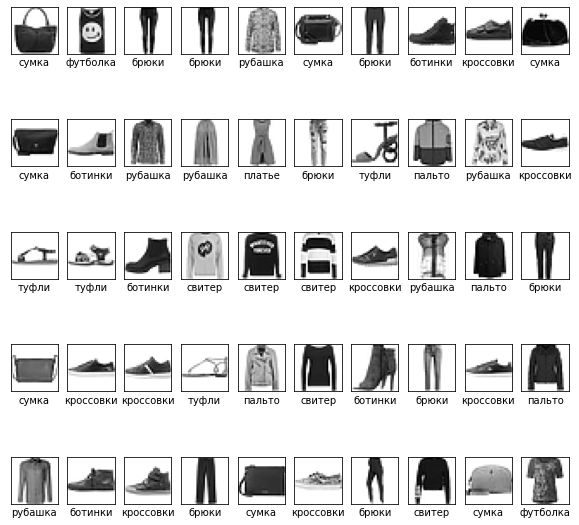

In [4]:
# Примеры изображений.
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [5]:
# Преобразование размерности данных. Первый параметр - число изображений. Второй параметр - количество пикселей в изображении.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [6]:
# Нормализация.
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# Преобразуем выходные данные в нужный формат.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [8]:
# Создадим простую последовательную модель, состоящую из 2 слоев.
model = Sequential()
# Входной полносвязный слой, 1000 нейронов.
model.add(Dense(1000, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов.
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [10]:
model.fit(x_train, y_train, batch_size=200, epochs=20, verbose=1)

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 1.4643 - accuracy: 0.5800
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.7503 - accuracy: 0.7664
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.6469 - accuracy: 0.7984
Epoch 4/20
300/300 [==============================] - 1s 5ms/step - loss: 0.5942 - accuracy: 0.8083
Epoch 5/20
300/300 [==============================] - 1s 5ms/step - loss: 0.5624 - accuracy: 0.8164
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.5408 - accuracy: 0.8214
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.5160 - accuracy: 0.8291
Epoch 8/20
300/300 [==============================] - 1s 5ms/step - loss: 0.5031 - accuracy: 0.8315
Epoch 9/20
300/300 [==============================] - 1s 5ms/step - loss: 0.4888 - accuracy: 0.8360
Epoch 10/20
300/300 [==============================] - 1s 5ms/step - loss: 0.4840 - accuracy: 0.8365

In [11]:
# Проверяем точность распознавания на тестовых данных.
ev = model.evaluate(x_test, y_test)
print('Accuracy: ', ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.8411
Accuracy:  0.8410999774932861


In [12]:
# Добавим к модели несколько скрытых слоев.
model_1 = Sequential()
model_1.add(Dense(1000, input_dim=784, activation="relu"))
model_1.add(Dense(800, input_dim=1000, activation="relu"))
model_1.add(Dense(500, input_dim=800, activation="relu"))
model_1.add(Dense(200, input_dim=500, activation="relu"))
model_1.add(Dense(10, activation="softmax"))

In [13]:
model_1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [14]:
model_1.fit(x_train, y_train, batch_size=200, epochs=20, verbose=1)

Epoch 1/20
300/300 [==============================] - 4s 13ms/step - loss: 1.5692 - accuracy: 0.5753
Epoch 2/20
300/300 [==============================] - 4s 13ms/step - loss: 0.6784 - accuracy: 0.7789
Epoch 3/20
300/300 [==============================] - 4s 13ms/step - loss: 0.5692 - accuracy: 0.8047
Epoch 4/20
300/300 [==============================] - 5s 15ms/step - loss: 0.5117 - accuracy: 0.8214
Epoch 5/20
300/300 [==============================] - 6s 21ms/step - loss: 0.4791 - accuracy: 0.8334
Epoch 6/20
300/300 [==============================] - 6s 21ms/step - loss: 0.4575 - accuracy: 0.8412
Epoch 7/20
300/300 [==============================] - 6s 21ms/step - loss: 0.4417 - accuracy: 0.8459
Epoch 8/20
300/300 [==============================] - 6s 21ms/step - loss: 0.4270 - accuracy: 0.8513
Epoch 9/20
300/300 [==============================] - 6s 20ms/step - loss: 0.4146 - accuracy: 0.8567
Epoch 10/20
300/300 [==============================] - 6s 20ms/step - loss: 0.4061 - accura

In [16]:
# Проверяем точность распознавания на тестовых данных.
ev_1 = model_1.evaluate(x_test, y_test)
print('Accuracy: ', ev_1[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8537
Accuracy:  0.8536999821662903


In [20]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [22]:
conv_model = Sequential()
conv_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
conv_model.add(Conv2D(32, kernel_size=3, activation='relu'))
conv_model.add(Flatten())
conv_model.add(Dense(50, activation = 'relu'))
conv_model.add(Dropout(0.2))
conv_model.add(Dense(10, activation='softmax'))
conv_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [25]:
conv_model.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
3000/3000 [==============================] - 89s 30ms/step - loss: 0.8987 - accuracy: 0.6730
Epoch 2/20
3000/3000 [==============================] - 95s 32ms/step - loss: 0.5098 - accuracy: 0.8123
Epoch 3/20
3000/3000 [==============================] - 95s 32ms/step - loss: 0.4410 - accuracy: 0.8394
Epoch 4/20
3000/3000 [==============================] - 96s 32ms/step - loss: 0.3959 - accuracy: 0.8566
Epoch 5/20
3000/3000 [==============================] - 102s 34ms/step - loss: 0.3617 - accuracy: 0.8680
Epoch 6/20
3000/3000 [==============================] - 103s 34ms/step - loss: 0.3296 - accuracy: 0.8805
Epoch 7/20
3000/3000 [==============================] - 103s 34ms/step - loss: 0.3085 - accuracy: 0.8876
Epoch 8/20
3000/3000 [==============================] - 98s 33ms/step - loss: 0.2936 - accuracy: 0.8922
Epoch 9/20
3000/3000 [==============================] - 98s 33ms/step - loss: 0.2808 - accuracy: 0.8973
Epoch 10/20
3000/3000 [==============================] - 98s 

In [28]:
# Проверяем точность распознавания на тестовых данных.
ev_2 = conv_model.evaluate(x_test, y_test)
print('Accuracy: ', ev_2[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2728 - accuracy: 0.9054
Accuracy:  0.9053999781608582


In [29]:
predictions = conv_model.predict(x_test)

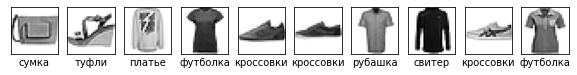

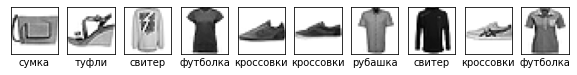

In [36]:
# Вывод результатов, полученных сверточной моделью.
plt.figure(figsize=(10,10))
for i in range(220,230):
    plt.subplot(5,10,i-200+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test.reshape(10000, 28, 28)[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(predictions[i])])

# Вывод правильных результатов.
plt.figure(figsize=(10,10))
for i in range(220,230):
    plt.subplot(5,10,i-200+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test.reshape(10000, 28, 28)[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(y_test[i])])